
## 1) Extract reviews of any product from ecommerce website like Amazon

### 2) Perform emotion mining

# Import Necessary Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [8]:
# Import extracted amazon reviews Dataset (How to Extract amazon reviews - Refer Extract Amazon Reviews using Scrapy.ipynb)
reviews=pd.read_csv('C:\\Users\\ADMIN\\extract_reviews.csv')
reviews

,stars,comment
0,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Some amazi...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Books are ...
2,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The concep...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n It is real...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The book i...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n My son lov...
1196,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The paper ...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Great prod...
1198,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Books are ...


## Text Preprocessing

In [9]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

["Some amazing set of books. My 1.5yr old nephew loves them. He walks around asking us to read with him. Books are durable too and can take a beating, tantrums, fingering and even a bit of soaking and still last.The syllabus is interesting to. Its a bit Canadian I think, yet relevant for Indians. Would buy more from this publisher for sure. 100% recommended. Buy it for a kid in the family or for a friend's kid as a gift.",
 "Books are made of hard cardboard type paper. Good for small kids, as they have tendency to tear pages. It's good If pages are made up of waterproof material. Books are small in size but good quality pictures.Due to it's small size kids can handle them easily. Nice start to reduce screen time for kids.",
 "The concept is good.topics r covered in a nice way only problem is that the pages aren't that thick,my 1 &half year old kid has easily folded it's pages vertically on very first day,so slightly disappointed.",
 "It is really nice product to help kids learn faster.

In [10]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

'Some amazing set of books. My 1.5yr old nephew loves them. He walks around asking us to read with him. Books are durable too and can take a beating, tantrums, fingering and even a bit of soaking and still last.The syllabus is interesting to. Its a bit Canadian I think, yet relevant for Indians. Would buy more from this publisher for sure. 100% recommended. Buy it for a kid in the family or for a friend\'s kid as a gift. Books are made of hard cardboard type paper. Good for small kids, as they have tendency to tear pages. It\'s good If pages are made up of waterproof material. Books are small in size but good quality pictures.Due to it\'s small size kids can handle them easily. Nice start to reduce screen time for kids. The concept is good.topics r covered in a nice way only problem is that the pages aren\'t that thick,my 1 &half year old kid has easily folded it\'s pages vertically on very first day,so slightly disappointed. It is really nice product to help kids learn faster.Can\'t c

In [11]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Some amazing set of books My 15yr old nephew loves them He walks around asking us to read with him Books are durable too and can take a beating tantrums fingering and even a bit of soaking and still lastThe syllabus is interesting to Its a bit Canadian I think yet relevant for Indians Would buy more from this publisher for sure 100 recommended Buy it for a kid in the family or for a friends kid as a gift Books are made of hard cardboard type paper Good for small kids as they have tendency to tear pages Its good If pages are made up of waterproof material Books are small in size but good quality picturesDue to its small size kids can handle them easily Nice start to reduce screen time for kids The concept is goodtopics r covered in a nice way only problem is that the pages arent that thickmy 1 half year old kid has easily folded its pages vertically on very first dayso slightly disappointed It is really nice product to help kids learn fasterCant complain about quality for product as it

In [12]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Some', 'amazing', 'set', 'of', 'books', 'My', '15yr', 'old', 'nephew', 'loves', 'them', 'He', 'walks', 'around', 'asking', 'us', 'to', 'read', 'with', 'him', 'Books', 'are', 'durable', 'too', 'and', 'can', 'take', 'a', 'beating', 'tantrums', 'fingering', 'and', 'even', 'a', 'bit', 'of', 'soaking', 'and', 'still', 'lastThe', 'syllabus', 'is', 'interesting', 'to', 'Its', 'a', 'bit', 'Canadian', 'I', 'think']


In [14]:
len(text_tokens)

28707

In [15]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Some', 'amazing', 'set', 'books', 'My', '15yr', 'old', 'nephew', 'loves', 'He', 'walks', 'around', 'asking', 'us', 'read', 'Books', 'durable', 'take', 'beating', 'tantrums', 'fingering', 'even', 'bit', 'soaking', 'still', 'lastThe', 'syllabus', 'interesting', 'Its', 'bit', 'Canadian', 'think', 'yet', 'relevant', 'Indians', 'Would', 'buy', 'publisher', 'sure', '100', 'recommended', 'Buy', 'kid', 'family', 'friends', 'kid', 'gift', 'Books', 'made', 'hard', 'cardboard', 'type', 'paper', 'Good', 'small', 'kids', 'tendency', 'tear', 'pages', 'Its', 'good', 'If', 'pages', 'made', 'waterproof', 'material', 'Books', 'small', 'size', 'good', 'quality', 'picturesDue', 'small', 'size', 'kids', 'handle', 'easily', 'Nice', 'start', 'reduce', 'screen', 'time', 'kids', 'concept', 'goodtopics', 'r', 'covered', 'nice', 'way', 'problem', 'pages', 'arent', 'thickmy', '1', 'half', 'year', 'old', 'kid', 'easily', 'folded', 'pages', 'vertically', 'first', 'dayso', 'slightly', 'disappointed', 'really', 'ni

In [16]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['some', 'amazing', 'set', 'books', 'my', '15yr', 'old', 'nephew', 'loves', 'he', 'walks', 'around', 'asking', 'us', 'read', 'books', 'durable', 'take', 'beating', 'tantrums', 'fingering', 'even', 'bit', 'soaking', 'still', 'lastthe', 'syllabus', 'interesting', 'its', 'bit', 'canadian', 'think', 'yet', 'relevant', 'indians', 'would', 'buy', 'publisher', 'sure', '100', 'recommended', 'buy', 'kid', 'family', 'friends', 'kid', 'gift', 'books', 'made', 'hard', 'cardboard', 'type', 'paper', 'good', 'small', 'kids', 'tendency', 'tear', 'pages', 'its', 'good', 'if', 'pages', 'made', 'waterproof', 'material', 'books', 'small', 'size', 'good', 'quality', 'picturesdue', 'small', 'size', 'kids', 'handle', 'easily', 'nice', 'start', 'reduce', 'screen', 'time', 'kids', 'concept', 'goodtopics', 'r', 'covered', 'nice', 'way', 'problem', 'pages', 'arent', 'thickmy', '1', 'half', 'year', 'old', 'kid', 'easily', 'folded', 'pages', 'vertically', 'first', 'dayso', 'slightly', 'disappointed', 'really', 'ni

In [17]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['some', 'amaz', 'set', 'book', 'my', '15yr', 'old', 'nephew', 'love', 'he', 'walk', 'around', 'ask', 'us', 'read', 'book', 'durabl', 'take', 'beat', 'tantrum', 'finger', 'even', 'bit', 'soak', 'still', 'lastth', 'syllabu', 'interest', 'it', 'bit', 'canadian', 'think', 'yet', 'relev', 'indian', 'would', 'buy', 'publish', 'sure', '100', 'recommend', 'buy', 'kid', 'famili', 'friend', 'kid', 'gift', 'book', 'made', 'hard', 'cardboard', 'type', 'paper', 'good', 'small', 'kid', 'tendenc', 'tear', 'page', 'it', 'good', 'if', 'page', 'made', 'waterproof', 'materi', 'book', 'small', 'size', 'good', 'qualiti', 'picturesdu', 'small', 'size', 'kid', 'handl', 'easili', 'nice', 'start', 'reduc', 'screen', 'time', 'kid', 'concept', 'goodtop', 'r', 'cover', 'nice', 'way', 'problem', 'page', 'arent', 'thickmi', '1', 'half', 'year', 'old', 'kid', 'easili', 'fold', 'page', 'vertic', 'first', 'dayso', 'slightli', 'disappoint', 'realli', 'nice', 'product', 'help', 'kid', 'learn', 'fasterc', 'complain', 'q

In [19]:
#Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

some amazing set books my 15yr old nephew loves he walks around asking us read books durable take beating tantrums fingering even bit soaking still lastthe syllabus interesting its bit canadian think yet relevant indians would buy publisher sure 100 recommended buy kid family friends kid gift books made hard cardboard type paper good small kids tendency tear pages its good if pages made waterproof material books small size good quality picturesdue small size kids handle easily nice start reduce screen time kids concept goodtopics r covered nice way problem pages arent thickmy 1 half year old kid easily folded pages vertically first dayso slightly disappointed really nice product help kids learn fastercant complain quality product good though apply exchange free first time seller delivered usedold product even teeth marks booksmy daughter soon wakes browse book she seems enjoy lot book nice bought year toddler enjoyed developed liking asking bring books could signal library month instea

In [20]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['some', 'amazing', 'set', 'book', 'my', '15yr', 'old', 'nephew', 'love', 'he', 'walk', 'around', 'ask', 'we', 'read', 'book', 'durable', 'take', 'beat', 'tantrum', 'fingering', 'even', 'bit', 'soak', 'still', 'lastthe', 'syllabus', 'interesting', 'its', 'bit', 'canadian', 'think', 'yet', 'relevant', 'indians', 'would', 'buy', 'publisher', 'sure', '100', 'recommend', 'buy', 'kid', 'family', 'friend', 'kid', 'gift', 'book', 'make', 'hard', 'cardboard', 'type', 'paper', 'good', 'small', 'kid', 'tendency', 'tear', 'page', 'its', 'good', 'if', 'page', 'make', 'waterproof', 'material', 'book', 'small', 'size', 'good', 'quality', 'picturesdue', 'small', 'size', 'kid', 'handle', 'easily', 'nice', 'start', 'reduce', 'screen', 'time', 'kid', 'concept', 'goodtopic', 'r', 'cover', 'nice', 'way', 'problem', 'page', 'be', 'not', 'thickmy', '1', 'half', 'year', 'old', 'kid', 'easily', 'fold', 'page', 'vertically', 'first', 'dayso', 'slightly', 'disappoint', 'really', 'nice', 'product', 'help', 'kid'

## Feature Extaction
### 1. Using CountVectorizer

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [24]:
print(cv.vocabulary_)

{'some': 1972, 'amazing': 172, 'set': 1885, 'book': 336, 'my': 1416, '15yr': 22, 'old': 1500, 'nephew': 1436, 'love': 1315, 'he': 1015, 'walk': 2275, 'around': 208, 'ask': 218, 'we': 2286, 'read': 1759, 'durable': 697, 'take': 2061, 'beat': 291, 'tantrum': 2065, 'fingering': 840, 'even': 766, 'bit': 323, 'soak': 1963, 'still': 2016, 'lastthe': 1242, 'syllabus': 2055, 'interesting': 1142, 'its': 1171, 'canadian': 424, 'think': 2117, 'yet': 2362, 'relevant': 1797, 'indians': 1115, 'would': 2342, 'buy': 411, 'publisher': 1707, 'sure': 2049, '100': 1, 'recommend': 1781, 'kid': 1193, 'family': 817, 'friend': 876, 'gift': 905, 'make': 1326, 'hard': 1006, 'cardboard': 433, 'type': 2199, 'paper': 1562, 'good': 924, 'small': 1942, 'tendency': 2079, 'tear': 2071, 'page': 1550, 'if': 1080, 'waterproof': 2282, 'material': 1343, 'size': 1919, 'quality': 1721, 'picturesdue': 1603, 'handle': 986, 'easily': 702, 'nice': 1444, 'start': 2009, 'reduce': 1788, 'screen': 1862, 'time': 2140, 'concept': 540,

In [25]:
print(cv.get_feature_names()[150:300])

['airplane', 'al', 'alfabet', 'all', 'allclear', 'allhe', 'allow', 'allworth', 'almost', 'alone', 'along', 'alot', 'alphabet', 'alphabetsthe', 'already', 'also', 'alternative', 'although', 'always', 'alwaysdelivere', 'amaze', 'amazed', 'amazing', 'amazingi', 'amazingly', 'amazon', 'amazone', 'american', 'amlost', 'amount', 'and', 'animal', 'animalsbird', 'animalsfruitsvegetable', 'animate', 'anither', 'another', 'ant', 'any', 'anything', 'anyway', 'anyways', 'anywhere', 'apart', 'apartwhen', 'apko', 'appeal', 'appear', 'appearance', 'appel', 'apple', 'apply', 'appreciate', 'apprehensive', 'appropriate', 'apt', 'aptly', 'area', 'around', 'aroundlovely', 'aroundother', 'arrange', 'arrangment', 'arrival', 'arrive', 'article', 'as', 'aside', 'ask', 'aso', 'assemble', 'asset', 'assorted', 'assume', 'assumed', 'at', 'ate', 'atleast', 'attach', 'attention', 'atteractive', 'attract', 'attractive', 'attractiveeasy', 'attractivequality', 'atttactive', 'audience', 'authentic', 'autism', 'av', 'av

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [26]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
print(reviewscv.toarray().shape)

(17645, 2431)


## 2. CountVectorizer with N-grams (Bigrams & Trigrams)

In [28]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [29]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '15', 'also', 'amazing', 'amazon', 'animal', 'attractive', 'awesome', 'baby', 'big', 'bit', 'board', 'book', 'box', 'buy', 'can', 'child', 'clear', 'collection', 'color', 'colour', 'colourful', 'content', 'could', 'daughter', 'do', 'easily', 'easy', 'enjoy', 'excellent', 'first', 'get', 'gift', 'give', 'go', 'good', 'great', 'hand', 'happy', 'hard', 'he', 'hold', 'image', 'its', 'keep', 'kid', 'learn', 'library', 'like', 'little', 'look', 'lot', 'love', 'make', 'many', 'material', 'money', 'month', 'much', 'must', 'my', 'nice', 'not', 'old', 'one', 'page', 'paper', 'perfect', 'picture', 'play', 'price', 'print', 'product', 'purchase', 'quality', 'read', 'really', 'recommend', 'see', 'set', 'she', 'show', 'size', 'small', 'son', 'start', 'tear', 'they', 'thick', 'thing', 'this', 'time', 'toddler', 'use', 'useful', 'very', 'well', 'worth', 'would', 'year']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## 3. TF-IDF Vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [31]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '100', '10month', '12', '13', '14', '15', '16', '18', '20', '23', '25', '399', '400', '499', 'abc', 'able', 'absolutely', 'accord', 'actually', 'add', 'adult', 'affordable', 'age', 'ahead', 'all', 'almost', 'alphabet', 'already', 'also', 'always', 'amazing', 'amazon', 'and', 'animal', 'apart', 'appropriate', 'apt', 'around', 'arrive', 'as', 'ask', 'at', 'atleast', 'attach', 'attention', 'attract', 'attractive', 'average', 'avoid', 'away', 'awesome', 'baby', 'back', 'background', 'bad', 'basic', 'be', 'bear', 'beautiful', 'because', 'begin', 'beginner', 'believe', 'big', 'bind', 'bird', 'birthday', 'bit', 'bite', 'board', 'book', 'books', 'box', 'boy', 'bright', 'bring', 'build', 'but', 'buy', 'buying', 'can', 'card', 'cardboard', 'carry', 'case', 'change', 'check', 'chew', 'child', 'children', 'choice', 'choose', 'clean', 'clear', 'cm', 'collection', 'color', 'colorful', 'colour', 'colourful', 'come', 'common', 'compact', 'compare', 'complete', 'condition', 'contain', 'content',

## Generate Word Cloud

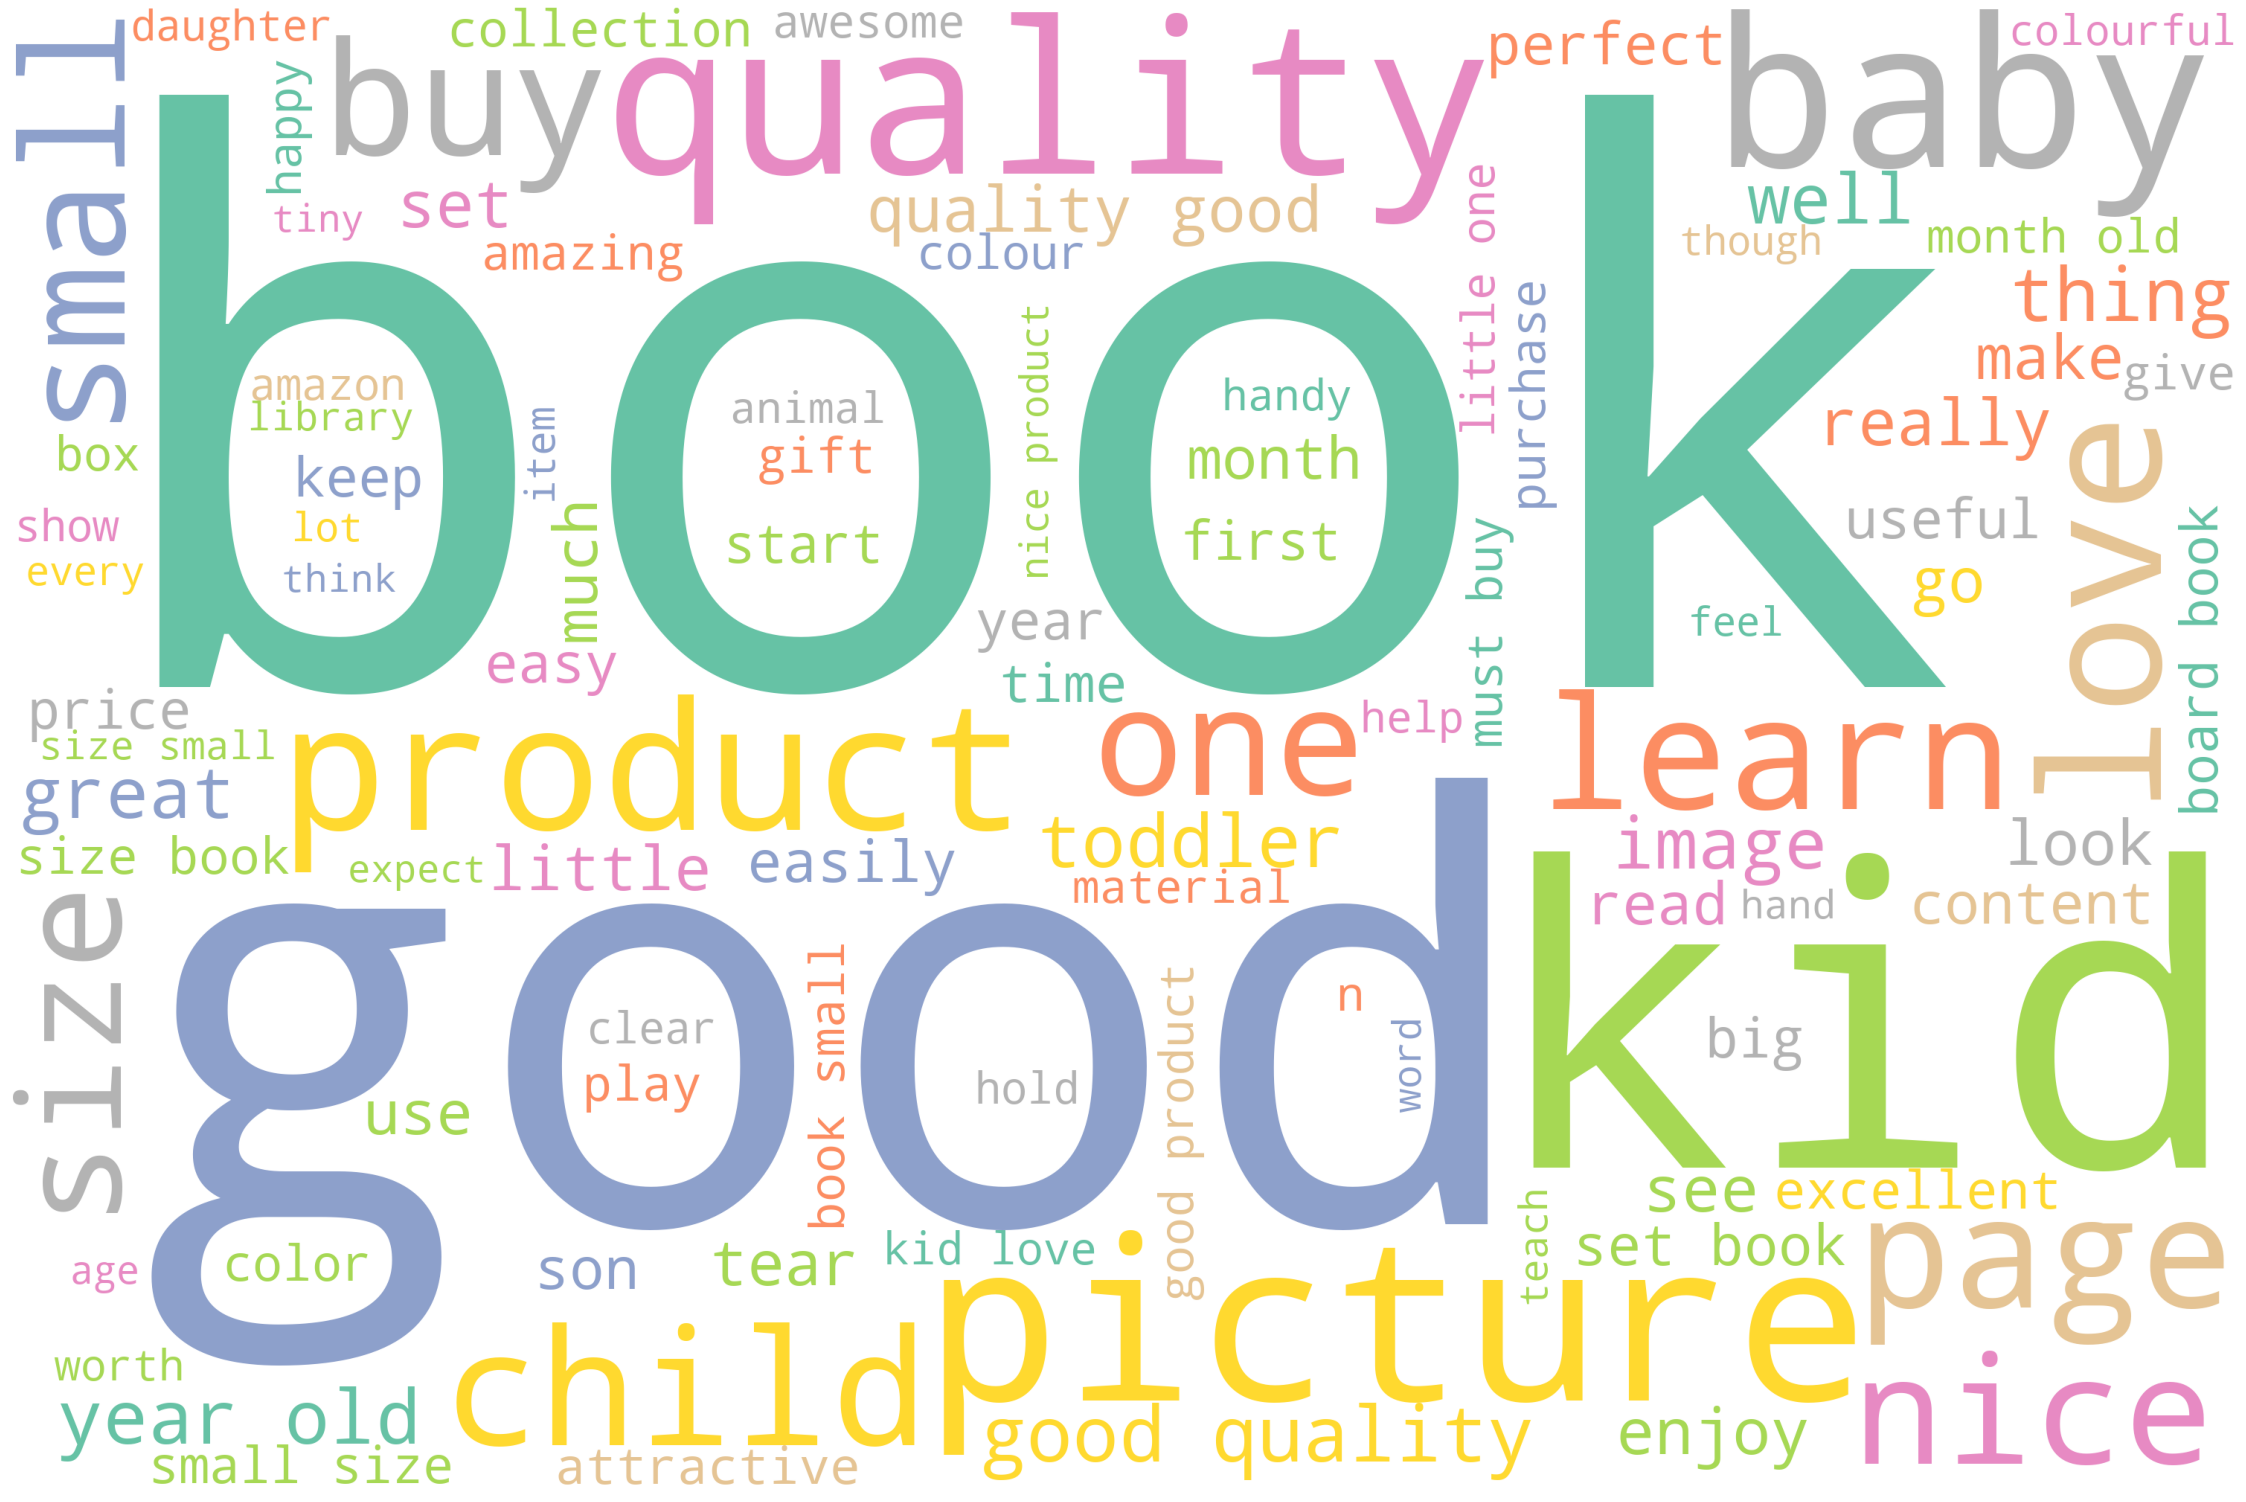

In [32]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [33]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [34]:
for token in doc_block[100:200]:
    print(token,token.pos_)

fold VERB
page NOUN
vertically ADV
first ADJ
dayso NOUN
slightly ADV
disappoint VERB
really ADV
nice ADJ
product NOUN
help VERB
kid NOUN
learn VERB
fastercant NUM
complain NOUN
quality NOUN
product NOUN
good ADJ
though ADV
apply VERB
exchange NOUN
free ADJ
first ADJ
time NOUN
seller NOUN
deliver VERB
usedold ADJ
product NOUN
even ADV
teeth PROPN
marks PROPN
booksmy PROPN
daughter NOUN
soon ADV
wake VERB
browse NOUN
book NOUN
she PRON
seem VERB
enjoy VERB
lot NOUN
book NOUN
nice ADJ
buy VERB
year NOUN
toddler NOUN
enjoyed VERB
develop VERB
like INTJ
ask VERB
bring NOUN
book NOUN
could AUX
signal VERB
library PROPN
month NOUN
instead ADV
look VERB
book NOUN
start VERB
nibble ADJ
book NOUN
hardbound ADJ
able ADJ
swallow NOUN
cardboard NOUN
make VERB
edge NOUN
soggy NOUN
keep VERB
away ADP
try AUX
interact VERB
orally ADV
somehow ADV
want VERB
get VERB
acquaint ADJ
book NOUN
thing NOUN
wish VERB
book NOUN
washable ADJ
wowwhen PROPN
see VERB
th PRON
pretty ADJ
book NOUN
small ADJ
infant NOU

In [35]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['soggy', 'keep', 'interact', 'want', 'get', 'book', 'thing', 'wish', 'book', 'see', 'book', 'infant', 'child', 'definately', 'book', 'child', 'learn', 'allclear', 'picture', 'nd', 'colour', 'create', 'intrest', 'book', 'carry', 'book', 'purse', 'give', 'product', 'book', 'give', 'gift', 'wish', 'keep', 'toddler', 'handle', 'picture', 'learnerswill', 'recommend', 'friend', 'seal', 'book', 'packing', 'think', 'contentpicture', 'kid', 'brain', 'suffer', 'autism', 'return', 'show', 'image', 'quality', 'book', 'shape', 'vegetable', 'transport', 'color', 'book', 'use', 'daughter', 'turn', 'year', 'use', 'bird', 'book', 'emu', 'hornbill', 'year', 'understand', 'book', 'understand', 'think', 'buy', 'book', 'need', 'size', 'quality', 'book', 'daughter', 'read', 'dayconsp', 'pizza', 'p', 'content', 'page', 'variety', 'topic', 'picture', 'child', 'understand', 'guide', 'learn', 'get', 'page', 'repeat', 'picture', 'vehicle', 'picture', 'farm']


In [36]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,book,901
1,quality,364
2,kid,315
3,love,229
4,product,228
5,size,226
6,picture,222
7,baby,216
8,buy,178
9,page,172


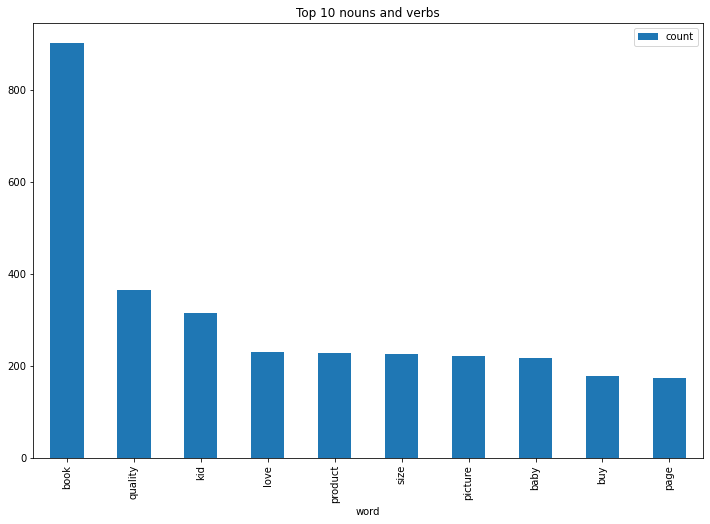

In [38]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [39]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Some amazing set of books.',
 'My 1.5yr old nephew loves them.',
 'He walks around asking us to read with him.',
 'Books are durable too and can take a beating, tantrums, fingering and even a bit of soaking and still last.The syllabus is interesting to.',
 'Its a bit Canadian I think, yet relevant for Indians.',
 'Would buy more from this publisher for sure.',
 '100% recommended.',
 "Buy it for a kid in the family or for a friend's kid as a gift.",
 'Books are made of hard cardboard type paper.',
 'Good for small kids, as they have tendency to tear pages.',
 "It's good If pages are made up of waterproof material.",
 "Books are small in size but good quality pictures.Due to it's small size kids can handle them easily.",
 'Nice start to reduce screen time for kids.',
 "The concept is good.topics r covered in a nice way only problem is that the pages aren't that thick,my 1 &half year old kid has easily folded it's pages vertically on very first day,so slightly disappointed.",
 "It is re

In [40]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Some amazing set of books.
1,My 1.5yr old nephew loves them.
2,He walks around asking us to read with him.
3,"Books are durable too and can take a beating, ..."
4,"Its a bit Canadian I think, yet relevant for I..."
...,...
2091,Product is same as shown Nice book for my 1.5 ...
2092,The material is sturdy and the thought and con...
2093,"Books are small, compact and portable.Loved th..."
2094,My son loves to learn frm it The paper quality...


In [42]:
# Emotion Lexicon - Affin
affin=pd.read_csv('C:\\Users\\ADMIN\\Downloads\\Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [45]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [46]:
# manual testing
calculate_sentiment(text='good service')

3

In [47]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        4
1        3
2        0
3        1
4        0
        ..
2091     3
2092     4
2093     3
2094     6
2095    12
Name: sentiment_value, Length: 2096, dtype: int64

In [48]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        5
1        6
2        9
3       24
4       10
        ..
2091    16
2092    19
2093     8
2094    18
2095    37
Name: word_count, Length: 2096, dtype: int64

In [49]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
829,No worry of these getting torn or damage if yo...,-7,19
82,The finish overall is poor Size of book is sma...,-6,42
571,He can roughly use it without a worry of damage.,-6,10
131,This are pocket books.Wrong way to sell item b...,-6,35
201,Corners are kept rounded to avoid accidental h...,-5,11
...,...,...,...
1654,Nice productMy son is very happy A good collec...,25,52
1482,"But great for children Not bad, neither too gr...",27,111
2044,Too Small I m happy to buy this but when I see...,30,71
669,My 2 and half year old baby loves it.....so ma...,31,70


In [50]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    2096.000000
mean        2.812023
std         3.678093
min        -7.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        32.000000
Name: sentiment_value, dtype: float64

In [51]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,He walks around asking us to read with him.,0,9
4,"Its a bit Canadian I think, yet relevant for I...",0,10
5,Would buy more from this publisher for sure.,0,8
8,Books are made of hard cardboard type paper.,-1,8
13,The concept is good.topics r covered in a nice...,-1,36
...,...,...,...
2077,Thanku Amazon.,0,2
2079,Specially the thick pages adds to the benifit ...,0,16
2083,with lot of content.,0,4
2088,Value for money.,0,3


In [52]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Some amazing set of books.,4,5
1,My 1.5yr old nephew loves them.,3,6
3,"Books are durable too and can take a beating, ...",1,24
6,100% recommended.,2,2
7,Buy it for a kid in the family or for a friend...,2,16
...,...,...,...
2091,Product is same as shown Nice book for my 1.5 ...,3,16
2092,The material is sturdy and the thought and con...,4,19
2093,"Books are small, compact and portable.Loved th...",3,8
2094,My son loves to learn frm it The paper quality...,6,18


In [53]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Some amazing set of books.,4,5,0
1,My 1.5yr old nephew loves them.,3,6,1
2,He walks around asking us to read with him.,0,9,2
3,"Books are durable too and can take a beating, ...",1,24,3
4,"Its a bit Canadian I think, yet relevant for I...",0,10,4
...,...,...,...,...
2091,Product is same as shown Nice book for my 1.5 ...,3,16,2091
2092,The material is sturdy and the thought and con...,4,19,2092
2093,"Books are small, compact and portable.Loved th...",3,8,2093
2094,My son loves to learn frm it The paper quality...,6,18,2094


C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

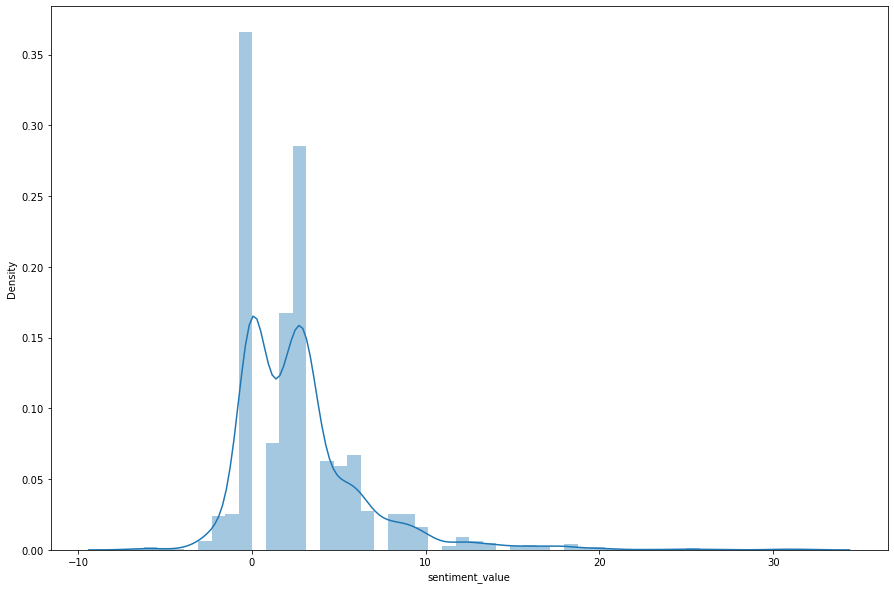

In [54]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

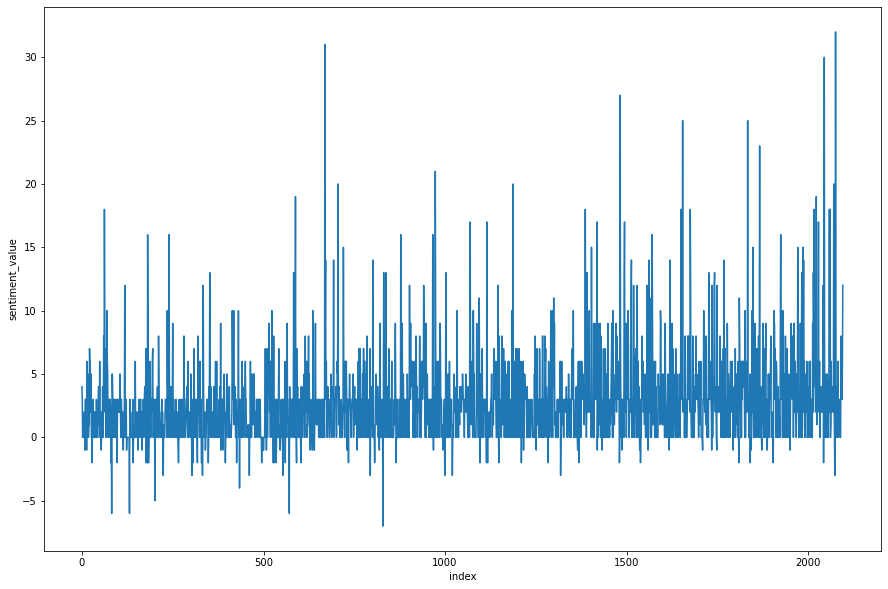

In [55]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)